## SIR Analysis of the graphs

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import EoN
import random


### Import the created graphs

In [2]:
# Read in a saved graph 
Graph = nx.read_gpickle('Network_Graph.gpickle')

# Number of edges
print('Number of nodes:', len(Graph.nodes))

# Number of edges
print('Number of edges:', len(Graph.edges))

# Density
print('Density of the graph:', nx.density(Graph))

numNodes = len(Graph.nodes)


Number of nodes: 3000
Number of edges: 60559
Density of the graph: 0.006731021451594976


In [3]:
# weakly connected components
df_weak = pd.DataFrame()
d = {}
indices = []
 
components = [C for C in nx.algorithms.components.weakly_connected_components(Graph)]
m = pd.Series([len(c) for c in components], name='Graph')
df_weak = pd.concat([df_weak, m.describe()], axis=1)    
d['Graph'] = m.value_counts()
round(df_weak, 2)


,Graph
count,285.00
mean,10.53
std,160.82
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,2716.00


In [4]:
# weakly_connected_components
indices = sorted(list(set([item for sublist in [list(v.index) for v in d.values()] for item in sublist])))
df_weak = pd.DataFrame(index=sorted(indices))
for k, v in d.items():
    df_weak = df_weak.join(v, how='outer')
df_weak = df_weak.fillna(0).astype(int)
df_weak = pd.concat([df_weak, pd.DataFrame(df_weak.sum(axis=0)).T])
df_weak.index.name = '#nodes'
df_weak


,Graph
#nodes,
1,284
2716,1
0,285


In [5]:
# Keep only the largest weakly connected component of the generated graph
Graph_weak_created = Graph.subgraph(components[np.argmax([len(i) for i in components])])


### SIR Simulation

https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.discrete_SIR.html#EoN.discrete_SIR

In [6]:
#initial fraction infected
rho = 0.05

#transmission rate
tau = 0.1

#recovery rate
gamma = 1 


In [7]:
for tau in[0.01, 0.05, 0.1]:
    # Created graphs
    REC_created = []
    TIME_created = []

    for i in range(100):
        t_created, S_created, I_created, R_created = EoN.discrete_SIR(Graph_weak_created, args = (tau,), rho=rho)
        R = R_created[-1]/len(Graph_weak_created.nodes)
        REC_created.append(R)
        TIME_created.append(len(t_created))

    print('Created:', np.round(np.mean(REC_created),3))
    print('Created:', np.mean(TIME_created))
    print()


Created: 0.08
Created: 9.07

Created: 0.353
Created: 8.67

Created: 0.465
Created: 7.12



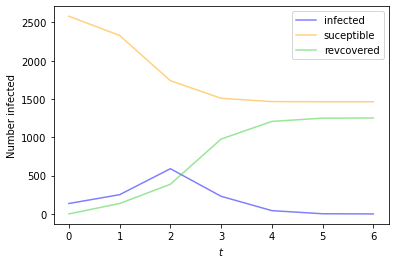

In [9]:
# Plot for the last simulation
plt.plot(t_created, I_created, label = 'infected', c='blue', alpha=0.5)
plt.plot(t_created, S_created, label = 'suceptible', c='orange', alpha=0.5)
plt.plot(t_created, R_created, label = 'revcovered', c='limegreen', alpha=0.5)

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()
